In [0]:
 class MyLinearRegression:
    def __init__(self, weight=3, bias=5, learning_rate=0.001,
                 iterations=100):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.it=[]
        self.cost_trend = [] 
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
            self.it.append(i)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

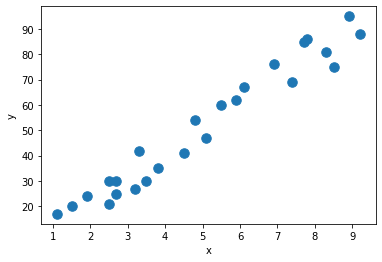

In [7]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y,s=90)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


# using iloc change input to output
X = studentscores.iloc[:, :-1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # split the datasets horizontally 

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)

Iteration: 0	 Weight: [3.433644]	 Bias: [5.06646]	 Cost: 622.1807764371597
Iteration: 1	 Weight: [3.8374194]	 Bias: [5.12824249]	 Cost: 541.6294938599218
Iteration: 2	 Weight: [4.21338454]	 Bias: [5.18566985]	 Cost: 471.79765434570254
Iteration: 3	 Weight: [4.56345592]	 Bias: [5.23904224]	 Cost: 411.25873906590607
Iteration: 4	 Weight: [4.88941795]	 Bias: [5.28863914]	 Cost: 358.77606704973067
Iteration: 5	 Weight: [5.19293208]	 Bias: [5.33472076]	 Cost: 313.277531996931
Iteration: 6	 Weight: [5.47554528]	 Bias: [5.37752939]	 Cost: 273.8337010576646
Iteration: 7	 Weight: [5.73869789]	 Bias: [5.41729062]	 Cost: 239.6388281765473
Iteration: 8	 Weight: [5.983731]	 Bias: [5.45421448]	 Cost: 209.99439413738543
Iteration: 9	 Weight: [6.21189328]	 Bias: [5.48849655]	 Cost: 184.29483706105046
Iteration: 10	 Weight: [6.42434735]	 Bias: [5.52031892]	 Cost: 162.0151818560071
Iteration: 11	 Weight: [6.62217572]	 Bias: [5.54985112]	 Cost: 142.70031591322743
Iteration: 12	 Weight: [6.80638627]	 Bias

In [11]:
regressor.it

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

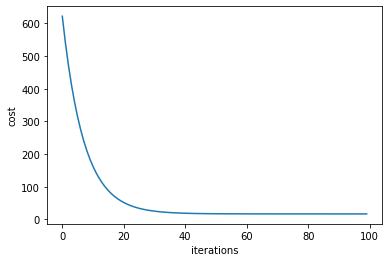

In [13]:
iterations=[1,2,3,4,5,6,7,8,9,10]
cost =[102.91008189424169,91.13317278598234,80.94548387910852,72.13255889976814,64.50888123548864,57.91396869153091,52.2089952377883,47.27386863183723,43.00470240023128,39.31162896162283]
plt.plot(regressor.it,regressor.cost_trend)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()